## Импорт данных

In [122]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ANN_classes as ann
import custom_classes as cc
from importlib import reload
import scipy.interpolate
from matplotlib.ticker import FuncFormatter

In [320]:
ann.vercheck('0.10.0')

ANN vercheck OK


In [319]:
reload(ann)

<module 'ANN_classes' from '/home/quantumfox/JupyterWorkfolder/Py3/ANN/ANN_classes.py'>

In [2]:
csvdata = []
with open('data_m.csv') as data_file:
    reader = csv.reader(data_file)
    for row in reader: 
        csvdata.append(row)
csvdata = np.array(csvdata, dtype=float)

## Представление данных

In [69]:
# по всем дням
n = csvdata[0]
gv = csvdata[1]
gt = csvdata[2]
gv_s = np.sort(gv)
gt_s = np.sort(gt)

In [70]:
gtv_lookup = dict(zip(zip(gt,gv),n))

i = 0
n_surf = np.array([])
for row in range(32):
    for col in range(32):
        try:
            n_surf = np.append(n_surf, gtv_lookup[(gt_s[col],gv_s[row])])
        except KeyError:
            n_surf = np.append(n_surf, 0)
n_surf = n_surf.reshape(32,32)

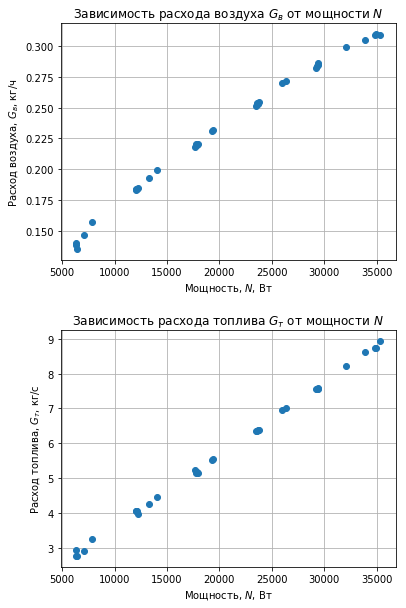

In [112]:
plt.figure(figsize=(6,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.plot(csvdata[0], csvdata[2], 'o')
ax2.plot(csvdata[0], csvdata[1], 'o')
ax1.set_title(u'Зависимость расхода воздуха $G_в$ от мощности $N$')
ax1.set_ylabel(u'Расход воздуха, $G_в$, кг/ч')
ax1.set_xlabel(u'Мощность, $N$, Вт')
ax2.set_title(u'Зависимость расхода топлива $G_т$ от мощности $N$')
ax2.set_ylabel(u'Расход топлива, $G_т$, кг/с')
ax2.set_xlabel(u'Мощность, $N$, Вт')

ax1.grid()
ax2.grid()
plt.subplots_adjust(hspace=0.3)
plt.show()

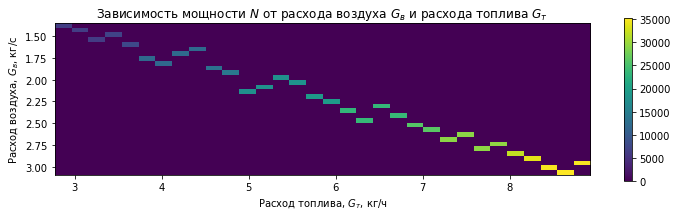

In [111]:
plt.figure(figsize=(12,12))
plt.imshow(n_surf, extent=
          (gv_s.min(), gv_s.max(),
          gt_s.max()*10, gt_s.min()*10),)
plt.colorbar(shrink=0.25)
plt.title(u'Зависимость мощности $N$ от расхода воздуха $G_в$ и расхода топлива $G_т$')
plt.xlabel(u'Расход топлива, $G_т$, кг/ч')
plt.ylabel(u'Расход воздуха, $G_в$, кг/с')
# plt.grid()
plt.show()

## Конфигурация и обучение нейросети

In [313]:
ann1 = ann.NNetwork(1,7,2)
# ann1.cfg_input(1)
ann1.cfg_mass()
ann1.nwgh_reset(0.3)

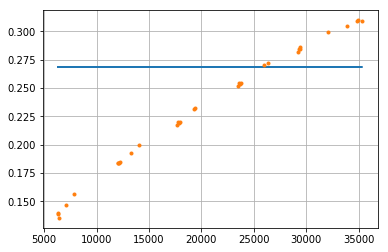

In [317]:
for _ in range(100):
    pick = np.random.randint(len(n))
    ann1.forward([n[pick]])
    ann1.getnetgrad([gt[pick], gv[pick]])
    ann1.backward()
    ann1.ncommit()

ann_gt = [ann1.forward([n])[0][0] for n in n]

plt.figure()
plt.plot(n, ann_gt)
plt.plot(n, gt, '.')
plt.grid()
plt.show()